## Assignment 07
### Note:
- For visualization, you have the freedom to choose one or many from
    - Matplotlib
    - Seaborn
    - Plotly Express 
    - any other library
- You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.
- Use use this notebook as your template and follow the instructions

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The links to the zip file is (you have already used it in your assignment 5):

- https://data.ed.gov/dataset/college-scorecard-all-data-files-through-6-2020/resources (The page containing link to the zip file)

- https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip (The link to download the zip file)

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


In [1]:
# <1> 
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import os


In [2]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

cwd = os.getcwd()

print("Current working directory:", cwd)


Current working directory: /Users/mhgrody/Downloads/Assingment7


In [4]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

dirs = os.listdir('/Users/mhgrody/Downloads/Assingment7/Raw Data Files')

for file in dirs:
    print(file)



MERGED2011_12_PP.csv
MERGED1999_00_PP.csv
MERGED2006_07_PP.csv
MERGED2014_15_PP.csv
Most-Recent-Cohorts-All-Data-Elements.csv
MERGED2003_04_PP.csv
MERGED1996_97_PP.csv
FieldOfStudyData1516_1617_PP.csv
Most-Recent-Cohorts-Field-of-Study.csv
MERGED2012_13_PP.csv
MERGED2005_06_PP.csv
MERGED2009_10_PP.csv
FieldOfStudyData1617_1718_PP.csv
MERGED2018_19_PP.csv
MERGED2017_18_PP.csv
Crosswalks.zip
MERGED2000_01_PP.csv
MERGED2001_02_PP.csv
MERGED2016_17_PP.csv
MERGED1997_98_PP.csv
MERGED1998_99_PP.csv
data.yaml
MERGED2004_05_PP.csv
MERGED2002_03_PP.csv
MERGED2015_16_PP.csv
MERGED2013_14_PP.csv
MERGED2007_08_PP.csv
MERGED2008_09_PP.csv
MERGED2010_11_PP.csv
FieldOfStudyData1415_1516_PP.csv


In [6]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

cleanFiles= [file for file in dirs if ".csv" and "MERGED" in file]

cleanFiles


['MERGED2011_12_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2010_11_PP.csv']

In [9]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

csvDir = '/Users/mhgrody/Downloads/Assingment7/Raw Data Files/'
dfList = []

for csv in cleanFiles:
    df = pd.read_csv(csvDir + csv, usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
    df['YEAR'] = csv[6:10]
    dfList.append(df)

df = pd.concat(dfList)

df['YEAR'] = df['YEAR'].astype(int)
df['TUITIONFEE_IN'] = df['TUITIONFEE_IN'].astype(float)

In [10]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 7469
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  float64
 4   ADM_RATE       44912 non-null   float64
 5   TUITIONFEE_IN  79195 non-null   float64
 6   YEAR           163331 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 10.0+ MB


In [11]:
df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100654,Alabama A & M University,AL,5.0,0.5010,6828.0,2011
1,100663,University of Alabama at Birmingham,AL,5.0,0.7223,6264.0,2011
2,100690,Amridge University,AL,5.0,NaN,8720.0,2011
3,100706,University of Alabama in Huntsville,AL,5.0,0.6368,8094.0,2011
4,100724,Alabama State University,AL,5.0,0.5080,8082.0,2011


In [13]:
df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
count,1.633310e+05,163330.000000,44912.000000,79195.000000,163331.000000
mean,9.432395e+05,4.554693,0.692951,11665.636871,2007.249481
std,4.571721e+06,2.189217,0.217058,9986.003542,6.608266
min,1.006360e+05,0.000000,0.000000,0.000000,1996.000000
25%,1.633380e+05,3.000000,0.555075,3776.000000,2002.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000,2008.000000
75%,4.075680e+05,6.000000,0.857100,16148.000000,2013.000000
max,4.914640e+07,9.000000,1.000000,74787.000000,2018.000000


In [14]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

UMBC = df[df['INSTNM']=='University of Maryland-Baltimore County']

In [15]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

UMBC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1694 to 1710
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   YEAR           23 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.4+ KB


In [16]:
UMBC.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1694,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003


In [17]:
UMBC.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
count,23.0,23.0,18.000000,19.000000,23.00000
mean,163268.0,2.0,0.640694,9004.842105,2007.00000
std,0.0,0.0,0.052728,1825.795421,6.78233
min,163268.0,2.0,0.568300,5490.000000,1996.00000
25%,163268.0,2.0,0.597600,8270.000000,2001.50000
50%,163268.0,2.0,0.632100,8872.000000,2007.00000
75%,163268.0,2.0,0.689375,10226.000000,2012.50000
max,163268.0,2.0,0.717400,11778.000000,2018.00000


In [19]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart


fig = px.bar(data_frame=UMBC, 
             x="YEAR", y="TUITIONFEE_IN",  
             color="INSTNM",
             labels={
                     "YEAR": "Year",
                     "TUITIONFEE_IN": "Tuition ($)",
                     "INSTNM": "Institution"
                 },
             title="UMBC Tution 2000-2018" 
             )
fig.show()


In [21]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart
UMBCSorted= UMBC.sort_values('YEAR')

fig = px.line(data_frame=UMBCSorted, 
             x="YEAR", y="TUITIONFEE_IN",  
             color="INSTNM",
             labels={
                     "YEAR": "Year",
                     "TUITIONFEE_IN": "Tuition ($)",
                     "INSTNM": "Institution"
                 },
             title="UMBC Tution 2000-2018" 
             )
fig.show()


In [44]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

tuitionList = UMBCSorted['TUITIONFEE_IN'].to_list()[4:]
tuitionList

[5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

In [45]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one
growthList = []

for i in range(0, len(tuitionList)-1):
    growth = ((tuitionList[i+1]/tuitionList[i])-1)*100
    growthList.append(growth)
growthList

[7.650273224043724,
 7.648054145516081,
 16.127004086765172,
 8.554412560909586,
 6.234413965087282,
 1.1971830985915588,
 0.9974483878450568,
 0.8268259072117701,
 1.0478359908883794,
 3.370153291253386,
 3.227565151019518,
 3.137213478398637,
 3.113478082752974,
 3.138657131505762,
 5.989984591679498,
 2.344175904052337,
 2.254971590909083,
 2.257336343115135]

In [47]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

growthListRound = [round(val,2) for val in growthList]

growthListRound

[7.65,
 7.65,
 16.13,
 8.55,
 6.23,
 1.2,
 1.0,
 0.83,
 1.05,
 3.37,
 3.23,
 3.14,
 3.11,
 3.14,
 5.99,
 2.34,
 2.25,
 2.26]

In [48]:
UMBCSorted.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [51]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

nan = ['NaN','NaN','NaN','NaN','NaN']

UMBC = UMBCSorted.assign(PCT_CHANGE = nan + growthListRound) 
UMBC

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.65
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.65
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.13
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.55
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.23


In [60]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart
UMBCSorted = UMBC.sort_values('YEAR')

fig = px.bar(data_frame=UMBCSorted, 
             x="YEAR", y="PCT_CHANGE",  
             color="INSTNM",
             labels={
                     "YEAR": "Year",
                     "PCT_CHANGE": "% Change",
                     "INSTNM": "Institution"
                 },
             title="UMBC Tution Year over Year Growth 2000-2018" 
             )
fig.show()



In [59]:
fig = px.line(data_frame=UMBCSorted, 
             x="YEAR", y="PCT_CHANGE",  
             color="INSTNM",
             labels={
                     "YEAR": "Year",
                     "PCT_CHANGE": "% Change",
                     "INSTNM": "Institution"
                 },
             title="UMBC Tution Year over Year Growth 2000-2018" 
             )
fig.show()

In [63]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

def percentChange(tuitionList):
    growthList = []

    for i in range(0, len(tuitionList)-1):
        growth = ((tuitionList[i+1]/tuitionList[i])-1)*100
        growthList.append(growth)
    
    growthListRound = [round(val,2) for val in growthList]
    
    return ['NaN','NaN','NaN','NaN','NaN']+growthListRound
 

In [64]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

JHU = df[df['INSTNM']=='Johns Hopkins University']

JHU

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1687,162928,Johns Hopkins University,MD,2.0,0.1940,42280.0,2011
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1792,162928,Johns Hopkins University,MD,2.0,0.2792,33900.0,2006
1603,162928,Johns Hopkins University,MD,2.0,0.1608,47060.0,2014
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
1653,162928,Johns Hopkins University,MD,2.0,0.1843,43390.0,2012
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005
1738,162928,Johns Hopkins University,MD,2.0,0.2782,39150.0,2009
1410,162928,Johns Hopkins University,MD,2.0,0.1148,53740.0,2018


<ipython-input-73-b364442a4730>:16: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



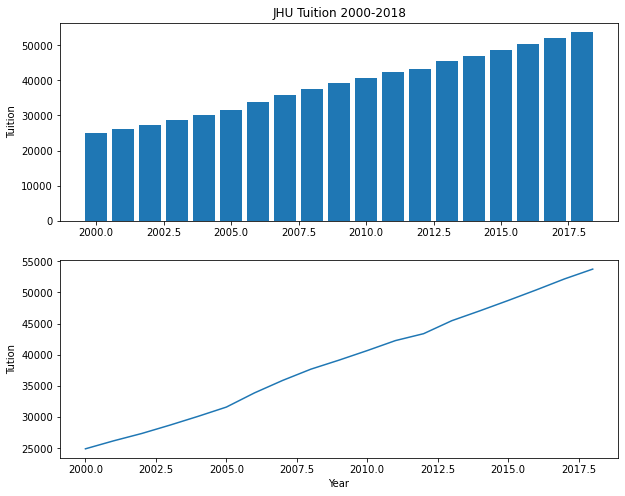

In [73]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together
fig, ax_list = plt.subplots(2,1,figsize=(10,8))


ax_list[0].bar(JHUSorted["YEAR"], JHUSorted["TUITIONFEE_IN"])
ax_list[0].set_title("JHU Tuition 2000-2018")
ax_list[1].set_xlabel("Year")
ax_list[0].set_ylabel("Tuition")

ax_list[1].plot(JHUSorted["YEAR"], JHUSorted["TUITIONFEE_IN"])
ax_list[1].set_xlabel("Year")
ax_list[1].set_ylabel("Tution")

fig.show()



In [76]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

JHUTuitionList = JHUSorted['TUITIONFEE_IN'].to_list()[4:]

percentChange(JHUTuitionList)

['NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 5.134376253509831,
 4.502098435711566,
 4.892296458561529,
 4.907761921336573,
 4.9104180491041705,
 7.210626185958247,
 5.899705014749257,
 5.013927576601662,
 3.8461538461538547,
 3.9080459770114873,
 3.9331366764995046,
 2.6253547776726505,
 4.793731274487212,
 3.496811084231366,
 3.506162345941344,
 3.4900431122972586,
 3.491370759769885,
 3.009392371094499]

In [77]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

JHU = JHUSorted.assign(PCT_CHANGE = percentChange(JHUTuitionList)) 
JHU

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,5.13438
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,4.5021
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,4.8923
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,4.90776
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,4.91042


<ipython-input-81-f88209909245>:9: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



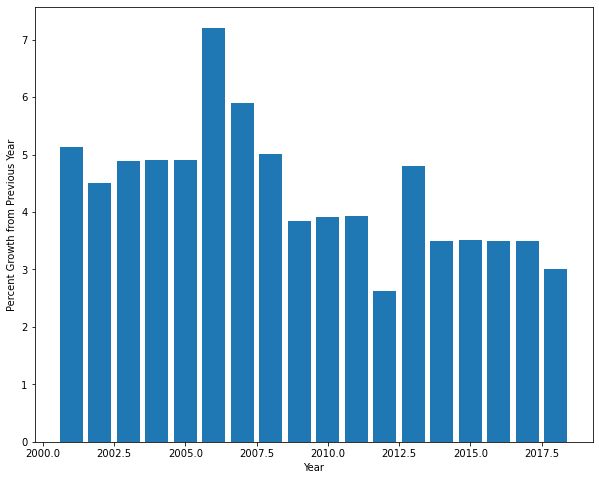

In [81]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

fig, ax_list = plt.subplots(figsize=(10,8))

ax_list.bar(JHU["YEAR"][5:], JHU["PCT_CHANGE"][5:])
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Percent Growth from Previous Year")

fig.show()



In [83]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

UMBC2 =UMBCSorted[['YEAR', 'PCT_CHANGE']] 
UMBC2.columns = ['YEAR', 'UMBC_PCT']
UMBC2

,YEAR,UMBC_PCT
2151,1996,NaN
2049,1997,NaN
1982,1998,NaN
1955,1999,NaN
1926,2000,NaN
1915,2001,7.65
1893,2002,7.65
1873,2003,16.13
1830,2004,8.55
1819,2005,6.23


In [85]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

JHU2 =JHU.sort_values('YEAR')[['YEAR', 'PCT_CHANGE']] 
JHU2.columns = ['YEAR', 'JHU_PCT']
JHU2



,YEAR,JHU_PCT
2139,1996,NaN
2039,1997,NaN
1973,1998,NaN
1946,1999,NaN
1917,2000,NaN
1906,2001,5.13438
1884,2002,4.5021
1865,2003,4.8923
1823,2004,4.90776
1812,2005,4.91042


In [86]:
# Now, merger the two data frames
# and display the new dataframe

merged = UMBC2.merge(JHU2, on='YEAR')
merged



,YEAR,UMBC_PCT,JHU_PCT
0,1996,NaN,NaN
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN
5,2001,7.65,5.13438
6,2002,7.65,4.5021
7,2003,16.13,4.8923
8,2004,8.55,4.90776
9,2005,6.23,4.91042


<ipython-input-88-989c2dd2a059>:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



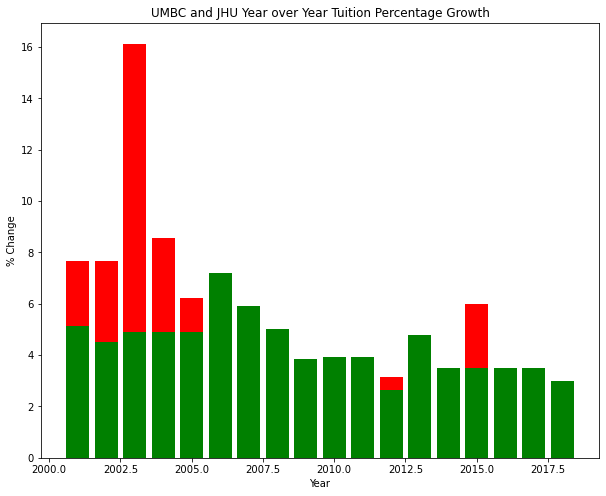

In [88]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(UMBC2["YEAR"][5:], UMBC2["UMBC_PCT"][5:], color = 'red')
ax.bar(JHU2["YEAR"][5:], JHU2["JHU_PCT"][5:], color = 'green')
ax.set_title("UMBC and JHU Year over Year Tuition Percentage Growth")
ax.set_xlabel("Year")
ax.set_ylabel("% Change")

fig.show()



<ipython-input-90-996e84e00933>:8: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



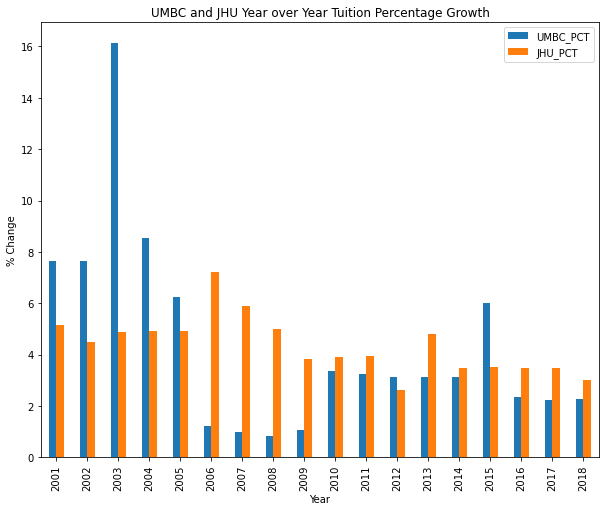

In [90]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

ax = merged[5:].plot.bar("YEAR",figsize=(10,8))
ax.set_title("UMBC and JHU Year over Year Tuition Percentage Growth")
ax.set_xlabel("Year")
ax.set_ylabel("% Change")

fig.show()


<ipython-input-91-a58da06769fe>:8: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



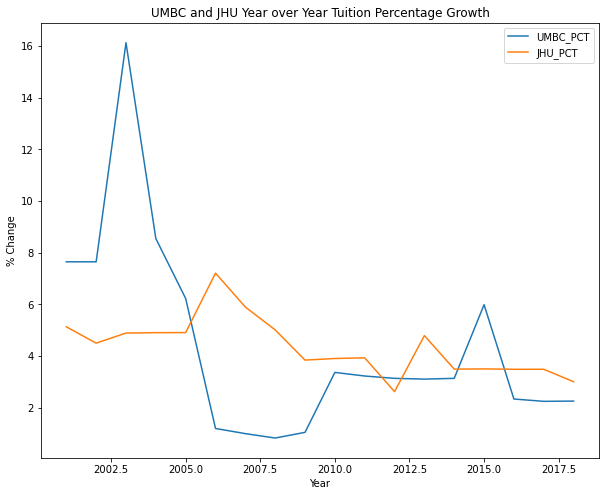

In [91]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

ax = merged[5:].plot("YEAR",figsize=(10,8))
ax.set_title("UMBC and JHU Year over Year Tuition Percentage Growth")
ax.set_xlabel("Year")
ax.set_ylabel("% Change")

fig.show()




In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### Based on my observation of the plots
#### Both UMBC's and JHU's tuition growth decreased by 2018 relative to 2000, however those decreases were not steady.
#### UMBC outpaced JHU in tuition growth until 2005, at which point JHU outpaced UMBC for the remaining years, with the exception of 2015.

In [ ]:
# The end.